In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Load the dataset
data = pd.read_csv('/content/workspace_export.csv')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data into features and target variable
X = data.drop(columns=['CustomerID'])  # Exclude 'CustomerID' from features
y = data['CustomerID']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Preprocessing pipeline
numeric_features = ['Quantity', 'UnitPrice']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['InvoiceNo', 'StockCode', 'Description', 'Country']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [ ]:
# Define the logistic regression model
log_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression())])



In [ ]:
# Train the logistic regression model
log_reg_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Quantity', 'UnitPrice']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['InvoiceNo', 'StockCode',
                                                   'Description',
                                                   'Country'])])),
                ('classifier', LogisticRegression())])

In [ ]:

# Make predictions
y_pred = log_reg_model.predict(X_test)




In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

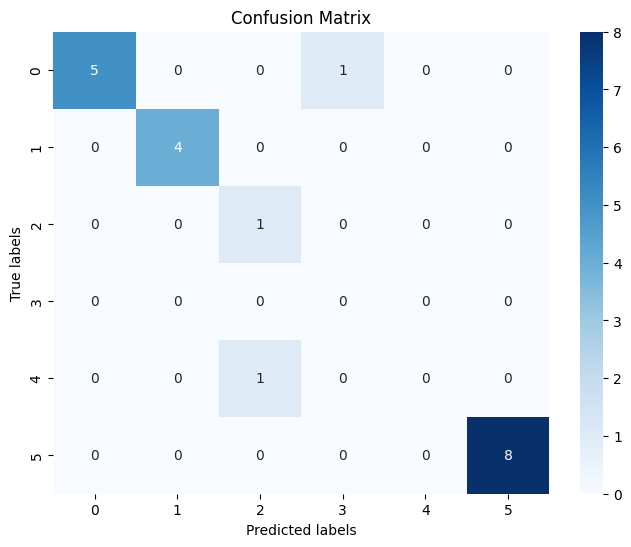

Classification Report:
              precision    recall  f1-score   support

       12583       1.00      0.83      0.91         6
       13047       1.00      1.00      1.00         4
       14688       0.50      1.00      0.67         1
       15100       0.00      0.00      0.00         0
       15291       0.00      0.00      0.00         1
       17850       1.00      1.00      1.00         8

    accuracy                           0.90        20
   macro avg       0.58      0.64      0.60        20
weighted avg       0.93      0.90      0.91        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))